<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 213: Data Science Programming II</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, August 3</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME:
KHANH TRAN

### A. Assignment Overview
This assignment provides the opportunity for you to practice with the data science in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

1. Write a good comment for each variable, each method, each control branch, and each loop. 
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct.  

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

## Question 1:
In Probability and statistics, the Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. For instance, the number of pieces of mail received in a day obeys a Poisson distribution. Other examples that may follow a Poisson include the number of phone calls received by a call center per hour and the number of decay events per second from a radioactive source. Mathematically, the probability mass function of the Poisson distribution is defined as:

$P(x= k\ events\ in\ interval)=e^{-\lambda }{\frac {\lambda ^{x}}{x!}}$

Write a function `poisson_pmf(x, lambda)` to compute the pmf of the Poisson distribution. Plot the Poisson distribution pmf in the range(0, 40) with the following lambda: 1, 4, 10, 20.

In [8]:
import math
import numpy as np
def poisson_pmf(x, lmbd):
    
    e = np.exp(1)
    ans = e**(-lmbd)*((lmbd**x)/math.factorial(x))
    
    return ans

In [10]:
np.exp(-1)

0.36787944117144233

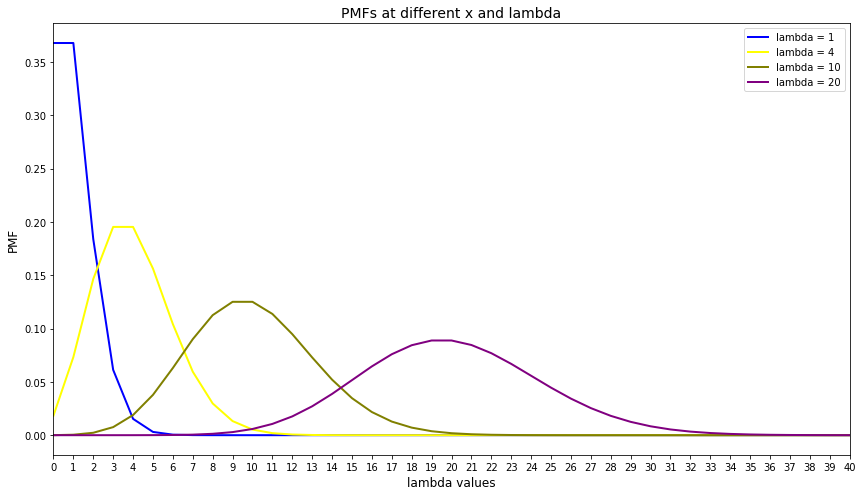

In [14]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

x_range = [i for i in range(41)]

# List of pmfs for each lamda value
pmfs_1 = [poisson_pmf(x,1) for x in x_range]
pmfs_4 = [poisson_pmf(x,4) for x in x_range]
pmfs_10 = [poisson_pmf(x,10) for x in x_range]
pmfs_20 = [poisson_pmf(x,20) for x in x_range]

# Draw the lines for each lambda value
fig, axes = plt.subplots(1,1, figsize=(12,7))
axes.plot(x_range, pmfs_1, color='blue', linewidth=2, label='lambda = 1')
axes.plot(x_range, pmfs_4, color='yellow', linewidth=2, label='lambda = 4')
axes.plot(x_range, pmfs_10, color='olive', linewidth=2, label='lambda = 10')
axes.plot(x_range, pmfs_20, color='purple', linewidth=2, label='lambda = 20')

# Title and labels
axes.set_title("PMFs at different x and lambda", size=14)
axes.set_xlabel("lambda values", size=12)
axes.set_xticks(x_range)
axes.set_ylabel("PMF", size=12)
axes.legend()

fig.tight_layout()
plt.margins(x=0)
plt.show()

## Question 2

Implement a Naive Bayes classification `naiveBayes_classify(word_probs, message)` for classifying an email message into spam or non-spam by using the word probability distributions, word_probs,  learned from a set of training data. 

In this question, you are asked to implement the Naive Bayes method from scratch by implementing the following functions. To simplify the implementation, we assume that any message is equally likely to be spam or not-spam.
* `tokenize(message)`: extracts a set of unique words from the given text message.
* `count_words(training_set)`: creates a dictionary containing the mappings from unique words to the frequencies of the words in 
    spam and non-spam messages in the training set
*  `word_probabilities(counts, total_spams, total_non_spams, k=0.5)`: turns the word_counts into a list of triplets w, p(w | spam) and p(w | ~spam)
* `spam_probability(word_probs, message)`: computes the probablity of spam for the given message.
* `naiveBayes_classify(word_probs, message)`: classifies the message as spam or ham

Using the data set `spam.csv` to evaluate the classification in terms of accuracy, recall, precision, and F1-score.

### Implement the following functions

In [170]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter, defaultdict
import math,re

def tokenize(message):
    """
    extracts the set of unique words from the given text message
    INPUT:
        message: a piece of text
    OUTPUT:
        a set of unique words
    """
    vec = CountVectorizer()
    X = vec.fit_transform([message])
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    result = list(df.columns.values)
    
    return result

In [283]:
def count_words(training_set):
    """
    creates a dictionary containing the mappings from unique words to the frequencies of the words in 
    spam and non-spam messages in the training set
    INPUT:
        training_set: training set consists of pairs (message, is_spam)
    OUTPUT:
        a map from unique words to their frequencies in spam and non-spam messages
    """
    messages = []

    for m,l in training_set:
        messages.append(m)
    
    # Join all messages into one text
    big_text = ''.join(messages)

    # Extract unique words in all messages
    all_words = tokenize(big_text)

    mapp = pd.DataFrame()

    # Dataframe of each word and its frequency in spam and non_spam messages 
    for m,l in training_set:
        try:
            vec = CountVectorizer()
            X = vec.fit_transform([m])
            df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
            df = df.T
            df.columns = ["Freq"]
            df["word"] = df.index
            df["is_spam"] = l
            mapp = pd.concat([mapp,df], axis=0)
        except ValueError:
            continue

    mapp = mapp.groupby(["word","is_spam"]).Freq.sum().reset_index(name="Freq")

    # Insert {word:{spam:freq, non_spam:freq}} into word2counts
    word2counts = {}
    for i in range(mapp.shape[0]):
        try:
            word = mapp.iloc[i,0]
            if list(mapp["word"].values).count(word) < 2:
                if mapp.iloc[i,1] == 0:
                    word2counts.update({word:{1:0, mapp.iloc[i,1]:mapp.iloc[i,2]}})
                elif mapp.iloc[i,1] == 1:
                    word2counts.update({word:{mapp.iloc[i,1]:mapp.iloc[i,2],0:0}})
            else:
                if word not in word2counts.keys():
                    spam_freq = 0
                    ham_freq = 0
                    if mapp.iloc[i,1] == 0:
                        ham_freq = mapp.iloc[i,2]
                        spam_freq = mapp.iloc[i+1,2]
                    elif mapp.iloc[i,1] == 1:
                        spam_freq = mapp.iloc[i,2]
                        ham_freq = mapp.iloc[i+1,2]

                    word2counts.update({word:{1:spam_freq,0:ham_freq}})
        except IndexError:
            break

    return word2counts

In [284]:
def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    """
    turns the word_counts into a list of triplets w, p(w | spam) and p(w | ~spam)
    INPUT:
        counts: a maps from unique words to their frequencies in spam and non-spam messages
        total_spams: the total number of spam messages
        total_non_spams: the total number of non-spam messages
        k=0.5: the smoothing parameter, default 0.5
    Formula:
        P(w|spam) = (spam + k) / (total_spams + 2 * k)
        P(w| ~spam) = (non_spam + k) / (total_non_spams + 2 * k)
    OUTPUT:
        a list of triples (w, p(w|spam), p(w|non-spam))
    """
    result = []
    
    # Calculting P(w|spam) and P(w|~spam)
    for word, is_spam_freq in counts.items():
        for is_spam, freq in is_spam_freq.items():
            
            if is_spam == 0:
                p_non_spam = (freq + k) / (total_non_spams + 2 * k)
            elif is_spam == 1:
                p_spam = (freq + k) / (total_spams + 2 * k)
            
        result.append((word, p_spam, p_non_spam))
    
    return result

In [300]:
def spam_probability(word_probs, message, k = 0.5):
    """
    computes the probablity of spam for the given message
    INPUT:
        word_probs: a list of triple (w, p(w|spam), p(w|non-spam))
        message: a message under classification
    OUTPUT:
        the probability of being spam for the message
    HINTS:
        First, get a set of unique words in the mesage.
        Second, sum up all the log probabilities of the unique words in the message.
        Third, get probabilities by taking exponentials of the probabilites (for spam and non-spam).
        Finally, return the ratio of probability of spam over the sum of the probabiliy of spam and the 
        probability of not spam.
     Formula:
      Dont forget to take logs and add them.
      prob_spam = math.exp(log_prob_spam)
      prob_ham =  math.exp(log_prob_ham)
    
    P(spam|message)= prob_spam / (prob_spam + prob_ham)
    """
    # Extract unique words in the message
    mess_words = tokenize(message)
    
    # Take log and add them
    log_prob_spam = 0
    log_prob_ham = 0
    for triplet in word_probs:
        if triplet[0] in mess_words:
            log_prob_spam += math.log(triplet[1])
            log_prob_ham += math.log(triplet[2])
    
    prob_spam = math.exp(log_prob_spam)
    prob_ham = math.exp(log_prob_ham)
    
    prob_spam_mess = prob_spam / (prob_spam + prob_ham)
    
    return prob_spam_mess

In [301]:
def naiveBayes_classify(word_probs, message):
    """
    classifies the message as spam or ham
    INPUT:
        word_probs: a list of triples (w, p(w|spam), p(w|non-spam))
        message: the message under classifiation
    OUTPUT:
        'spam' or 'ham' indicating the classification of the message.
    HINTS:
        If you split the data set into test and train, you might come across words 
        in test set that have not been seen in training set. Make sure to handle this.
    """
    spam_prob = spam_probability(word_probs, message)
    
    if spam_prob >= 0.5:
        result = "spam"
    elif spam_prob < 0.5:
        result = "ham"
    
    return result

### Test and Evaluate

In [287]:
import pandas as pd
import numpy as np
spam = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')

In [288]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [289]:
spam['is_spam'] = spam['label'].map({'spam':1, 'ham':0})

In [290]:
training_set = list(zip(spam['text'], spam['is_spam']))

In [291]:
training_set

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0),
 ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  1),
 ('U dun say so early hor... U c already then say...', 0),
 ("Nah I don't think he goes to usf, he lives around here though", 0),
 ("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
  1),
 ('Even my brother is not like to speak with me. They treat me like aids patent.',
  0),
 ("As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
  0),
 ('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 0906170146

In [292]:
for m,l in training_set:
    print

In [293]:
counts = count_words(training_set)

In [294]:
total_spams = spam['is_spam'].sum()

In [295]:
total_non_spams = spam.shape[0] - total_spams

In [296]:
word_probs = word_probabilities(counts, total_spams, total_non_spams, k=0.5)

In [306]:
y_pred = []
for i in range(spam.shape[0]):
    try:
        y_pred.append(naiveBayes_classify(word_probs, spam['text'][i]))
    # In case of ValueError where the message's vocabulary is empty, such as ":)"
    except ValueError:
        y_pred.append("spam")

### Continue to evaluate the accuracy, recall, precision, and F1-score below

In [313]:
y_pred_series = pd.Series(y_pred)

acc = sum(y_pred==spam["label"].values)/len(spam["label"].values)

print("Accuracy:", acc)

Accuracy: 0.8767049533381192


In [314]:
# True Positive, False Negative, False Positive, True Negative for "Spam"
tp = sum((spam["label"] == 'spam') & (y_pred_series == 'spam'))
fn = sum((spam["label"] == 'spam') & (y_pred_series != 'spam'))
fp= sum((spam["label"]  != 'spam') & (y_pred_series == 'spam'))
tn = sum((spam["label"] != 'spam') & (y_pred_series != 'spam'))

print("recall for class 'spam' = " + str(tp / (tp + fn)))
print("precision for class 'spam' = " + str(tp / (tp + fp)))
print("F1 Score for class 'spam' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'spam' = 0.998661311914324
precision for class 'spam' = 0.520949720670391
F1 Score for class 'spam' = 0.6847177604405691


In [315]:
# True Positive, False Negative, False Positive, True Negative for "Non_Spam"
tp = sum((spam["label"] == 'ham') & (y_pred_series == 'ham'))
fn = sum((spam["label"] == 'ham') & (y_pred_series != 'ham'))
fp= sum((spam["label"]  != 'ham') & (y_pred_series == 'ham'))
tn = sum((spam["label"] != 'ham') & (y_pred_series != 'ham'))

print("recall for class 'ham' = " + str(tp / (tp + fn)))
print("precision for class 'ham' = " + str(tp / (tp + fp)))
print("F1 Score for class 'ham' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'ham' = 0.8578238341968912
precision for class 'ham' = 0.9997584541062802
F1 Score for class 'ham' = 0.9233686558839933


## Question 3
The data set `news.csv` contains about 422, 000 news article classified into 4 categories: b, e, m, t. Build a Naive Bayes classifier using the MultinomialNB method in the Scikit Learn package. Split the data set into training and set sets using the `train_test_split()` method in Scikit Learn. There are number of vectorizers in the Scikit Learn feature_extraction.text package for creating feature vectors from strings. Use the methods in Scikit Learn metrics package to evaluate the performance of classification.

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
news = pd.read_csv("news.csv")

In [325]:
# Map the 'CATEGORY' to numerical values
news["CATEGORY"] = news["CATEGORY"].replace({"b":1,"t":2,"e":3,"m":4})

In [329]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news['TITLE'], news['CATEGORY'], random_state = 1)

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the training and test data 
model_vectorizer = TfidfVectorizer()
model_vectorizer.fit(X_train)
vectors = model_vectorizer.transform(X_train)
pd.DataFrame(vectors.toarray(), columns=vec.get_feature_names())

,00,000,00000,00001,00070081,00070744,00070766,0007458,0017a43b2370,0019,...,مرس,وائرسان,ٹی,ہلاک,巴丢草,닫기,레이어,복사,줄이기,ﬁrst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [338]:
from sklearn.naive_bayes import MultinomialNB
# Create a MultinomialNB classifier and fit the model
model_classifier = MultinomialNB()
model_classifier.fit(X, y_train)

test_vectors = model_vectorizer.transform(X_test)

## Evaluate the Model

In [340]:
# Predict the test data
y_pred = model_classifier.predict(test_vectors)

In [341]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred, average = 'weighted'))
print("Precision score: ", precision_score(y_test, y_pred, average = 'weighted'))
print("F1 score: ", f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.923867241134416
Recall score:  0.923867241134416
Precision score:  0.9243447024125798
F1 score:  0.9236268319451827
